In [19]:
from salad.datasets.da import load_dataset2, load_dataset

data = load_dataset2('/tmp/data', train=False)

In [49]:
from torchvision import datasets

datasets.CIFAR10(root='/tmp/data', download=True)

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: /tmp/data
    Transforms (if any): None
    Target Transforms (if any): None

In [66]:
datasets.STL10(root='/gpfs01/bethge/share/domainadapt', download=True)

Using downloaded and verified file: /gpfs01/bethge/share/domainadapt/stl10_binary.tar.gz


Dataset STL10
    Number of datapoints: 5000
    Split: train
    Root Location: /gpfs01/bethge/share/domainadapt
    Transforms (if any): None
    Target Transforms (if any): None

In [4]:
import torch

for ds in ['mnist', 'svhn']:

    X = torch.zeros((len(data[ds]),3,32,32) )
    for i, (x, y) in enumerate(data[ds]):
        X[i] = x

    mu = X.numpy().mean(axis=(0,2,3))
    sd = X.numpy().std(axis=(0,2,3))

    print(mu,sd)

[-1.2587721 -1.2587721 -1.2587721] [0.89874333 0.89874333 0.89874333]
[-0.3305844  -0.29504207 -0.14608914] [1.0505141 1.0547436 1.0584469]


In [61]:
from evaluate import evaluate

import os

os.chdir('/gpfs01/bethge/home/sschneider/thesis/code/domainadaptation/')

In [64]:
root = ['log/testruns/20180815-222810_SelfEnsemblingSolver/20180815-222810-checkpoint-ep17.pth']

from train_ensemble import SVHN_MNIST_Model

dataloader = torch.utils.data.DataLoader(data['mnist'], batch_size=512,
                        shuffle=False)

l,y,f = evaluate(root, dataloader, None)

/usr/local/lib/python3.5/dist-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'torch.nn.modules.instancenorm.InstanceNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.5/dist-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.5/dist-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attr

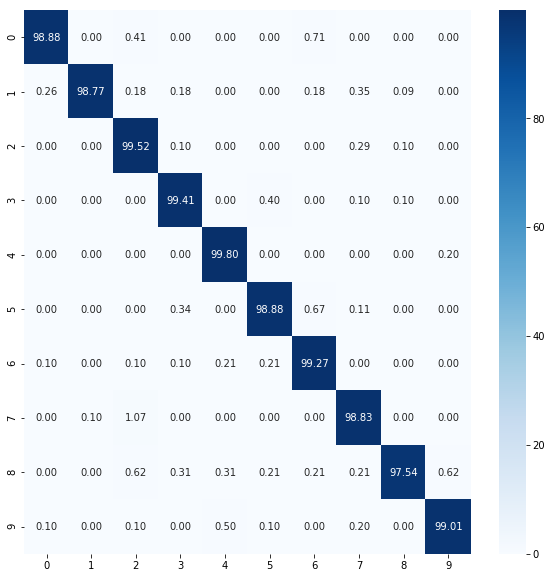

In [65]:
y = y.squeeze()
l = l.squeeze()

from sklearn.metrics import confusion_matrix
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cfm = confusion_matrix(l, y.argmax(axis=-1)).astype(float)

cfm /= cfm.sum(axis=1, keepdims=True)

plt.figure(figsize=(10,10))
sns.heatmap(100*cfm, annot=True, cmap='Blues', fmt='.2f')